_Valentin Hulot - M1_IL - 02/2020_

# TP2 Hearthstone Dataset

We want to :  
- **Part1 : Search deck sets**  
    - Read dataset  
    - Exclude Begin & TheCoin  
    - (Bonus) Little Visualization  
    - Extract all decks  
    - Print in a formatted file for SPMF  

- **Part 2 : Sequential rules**  

# Part1 : Search deck sets

## Read Dataset

In [1]:
# Import panda & numpy
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load file into dataframe
file = "./data/all_absolute+.txt"
data = pd.read_csv(file, sep=" ", header=None)
data.head()

,0,1,2
0,0,Begin,0
1,0,MTwilightWhelp,1
2,0,OTheCoin,1
3,0,ONerubianEgg,1
4,0,MLesserHeal,2


In [3]:
# Rename columns
data.rename({0: 'gameId', 1: 'cardName',2:'turnId'},axis='columns',inplace=True, errors='raise')
data.head()

,gameId,cardName,turnId
0,0,Begin,0
1,0,MTwilightWhelp,1
2,0,OTheCoin,1
3,0,ONerubianEgg,1
4,0,MLesserHeal,2


In [4]:
# Extract playerId from cardName
data.loc[data.cardName != "Begin", "playerId"] = data["cardName"].str.slice(0,1)
data.loc[data.cardName != "Begin", "cardName"] = data["cardName"].str.slice(1)
data.head()

,gameId,cardName,turnId,playerId
0,0,Begin,0,NaN
1,0,TwilightWhelp,1,M
2,0,TheCoin,1,O
3,0,NerubianEgg,1,O
4,0,LesserHeal,2,M


In [5]:
# Reorder columns for visibility
data = data.reindex(columns=['gameId',"playerId","cardName","turnId"])
data.head()

,gameId,playerId,cardName,turnId
0,0,NaN,Begin,0
1,0,M,TwilightWhelp,1
2,0,O,TheCoin,1
3,0,O,NerubianEgg,1
4,0,M,LesserHeal,2


In [6]:
count = data.count()
count

gameId      7439
playerId    7232
cardName    7439
turnId      7439
dtype: int64

# Exclude Begin & TheCoin

In [7]:
# Get list of unique cards
uniqueCards = data.cardName.unique()
uniqueCards[:10]

array(['Begin', 'TwilightWhelp', 'TheCoin', 'NerubianEgg', 'LesserHeal',
       'AbusiveSergeant', 'MortalCoil', 'DarkCultist',
       'PowerOverwhelming', 'LifeTap'], dtype=object)

In [8]:
#Eclude Begin & TheCoin
uniqueCards = np.delete(uniqueCards, np.argwhere((uniqueCards == "Begin") | (uniqueCards== "TheCoin")))
uniqueCards[:10]

array(['TwilightWhelp', 'NerubianEgg', 'LesserHeal', 'AbusiveSergeant',
       'MortalCoil', 'DarkCultist', 'PowerOverwhelming', 'LifeTap',
       'ImpGangBoss', 'BlackwingCorruptor'], dtype=object)

In [9]:
uniqueCards.size

455

In [10]:
# Exclude champions power
powers = ["ArmorUp!","DaggerMastery","Fireblast","LesserHeal","LifeTap","Reinforce","Shapeshift","SteadyShot","TotemicCall"]
uniqueCards = np.setdiff1d(uniqueCards,powers)
uniqueCards[:10]

array(['AbusiveSergeant', 'AcidicSwampOoze', 'AcolyteofPain',
       'AldorPeacekeeper', 'Alexstrasza', 'AmaniBerserker',
       'AncestralKnowledge', 'AncestralSpirit', 'AncientSecrets',
       'AncientWatcher'], dtype=object)

In [11]:
uniqueCards.size

446

## (Bonus) Little Visualization

In [12]:
# Create a variable called 'freq' to hold the weight values and their frequencies
freq = data['cardName'].value_counts()
# Convert the freq object to a data frame. Use to_frame().
freq = freq.to_frame().reset_index()

In [13]:
# Rename the columns in the dataframe. 
freq.columns = ['cardName','freq']
# Verify the result.
freq.head()

,cardName,freq
0,Fireblast,467
1,LesserHeal,407
2,Begin,207
3,TheCoin,187
4,Shapeshift,170


In [14]:
freq= freq[freq.cardName.isin(uniqueCards)]
# Verify the result.
freq.head()

,cardName,freq
5,PilotedShredder,163
9,HauntedCreeper,99
11,AzureDrake,96
12,Dr.Boom,88
14,SludgeBelcher,83


In [15]:
# Get top 20 most played cards
freqToPlot = freq.head(20).sort_values('freq')

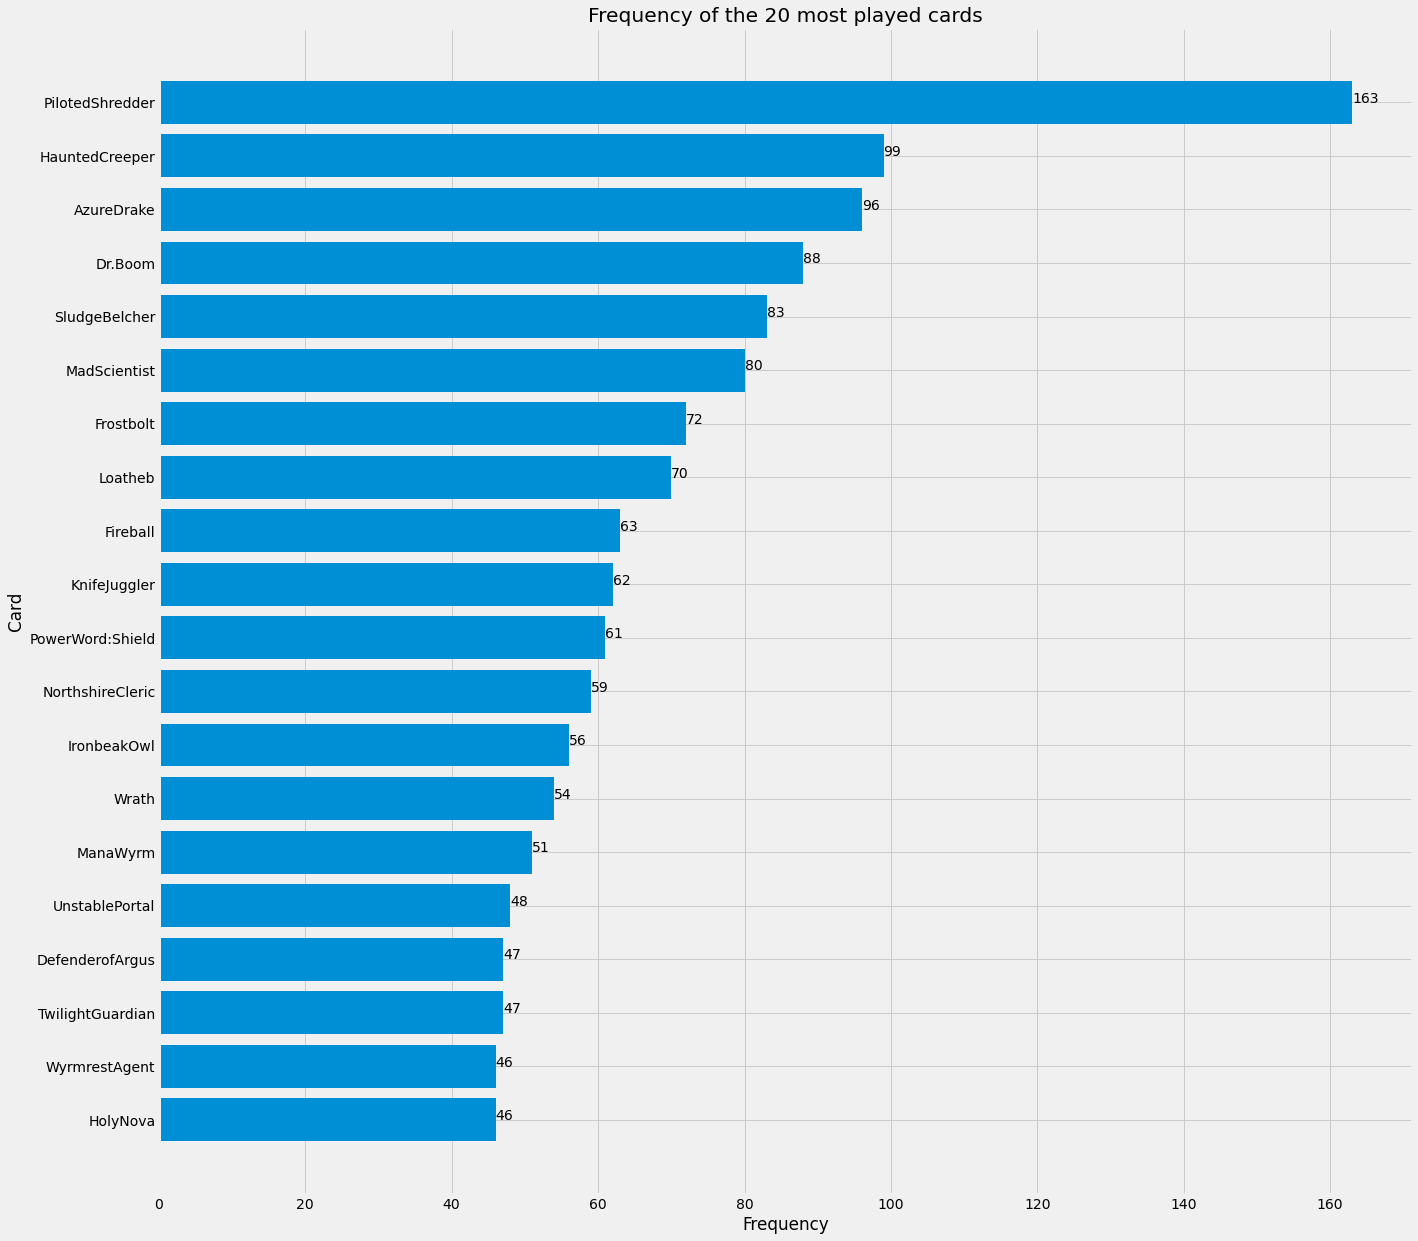

In [16]:
with  plt.style.context('fivethirtyeight'):
    # Set a size for the graph
    plt.figure(figsize=(20,20))

    # Add axis labels
    plt.title('Frequency of the 20 most played cards')
    plt.ylabel('Card')
    plt.xlabel('Frequency')

    # Plot the graph using a round symbol "o" of size 10
    #plt.plot(freq.cardName,freq.freq, "o", markersize = 10, color = 'g')
    plt.barh(freqToPlot.cardName,freqToPlot.freq)

    for index, value in enumerate(freqToPlot.freq):
        plt.text(value, index, str(value))

    plt.show()

## Extract all decks

### Prepare dataframe

In [17]:
# Copy dataframe
deckDf = data
deckDf

,gameId,playerId,cardName,turnId
0,0,NaN,Begin,0
1,0,M,TwilightWhelp,1
2,0,O,TheCoin,1
3,0,O,NerubianEgg,1
4,0,M,LesserHeal,2
...,...,...,...,...
7434,206,O,ShieldedMinibot,11
7435,206,M,Hellfire,12
7436,206,M,INFERNO!,12
7437,206,O,TruesilverChampion,12


In [18]:
# Sort to get deck 1 then 2, then 3...
deckDf = deckDf.sort_values(by=['gameId', 'playerId'])
deckDf.head()

,gameId,playerId,cardName,turnId
1,0,M,TwilightWhelp,1
4,0,M,LesserHeal,2
5,0,M,LesserHeal,2
8,0,M,DarkCultist,3
11,0,M,DarkCultist,4


In [19]:
# Filter cards
deckDf= deckDf[deckDf.cardName.isin(uniqueCards)]
deckDf

,gameId,playerId,cardName,turnId
1,0,M,TwilightWhelp,1
8,0,M,DarkCultist,3
11,0,M,DarkCultist,4
13,0,M,BlackwingCorruptor,5
15,0,M,AzureDrake,6
...,...,...,...,...
7428,206,O,Loatheb,10
7432,206,O,AldorPeacekeeper,11
7433,206,O,MusterforBattle,11
7434,206,O,ShieldedMinibot,11


In [20]:
# test get index
i = np.where(uniqueCards == "Loatheb")[0][0]
i

252

In [21]:
# add cards id
deckDf["cardId"]  = deckDf.apply(lambda row: np.where(uniqueCards == row["cardName"])[0][0], axis=1)
deckDf.head()

,gameId,playerId,cardName,turnId,cardId
1,0,M,TwilightWhelp,1,410
8,0,M,DarkCultist,3,89
11,0,M,DarkCultist,4,89
13,0,M,BlackwingCorruptor,5,47
15,0,M,AzureDrake,6,35


### Write file

In [22]:
# New file for output
f = open("output.txt", "w")

In [23]:
''' Template
@CONVERTED_FROM_TEXT
@ITEM=1=apple
@ITEM=2=orange
@ITEM=3=tomato
@ITEM=4=milk
@ITEM=5=bread
1 3 4
2 3 5
1 2 3 5
2 5
1 2 3 5
'''

' Template\n@CONVERTED_FROM_TEXT\n@ITEM=1=apple\n@ITEM=2=orange\n@ITEM=3=tomato\n@ITEM=4=milk\n@ITEM=5=bread\n1 3 4\n2 3 5\n1 2 3 5\n2 5\n1 2 3 5\n'

In [24]:
f.write("@CONVERTED_FROM_TEXT\n")

21

In [25]:
# Write cards
# /!\ ITEM MUST START WITH 1 instead of 0 -> offset/!\
offset = 1

def printItemsHeaders(file,itemList,offset):
    for i,elem in enumerate(itemList):
        f.write("@ITEM={}={}\n".format(i+offset,elem))
        
printItemsHeaders(f,uniqueCards,offset)

In [26]:
# Write decks
offset = 1

# init with first row value
oldPlayerId = deckDf["playerId"][1]
for index, row in deckDf.iterrows():
    # if player change
    if(row["playerId"] != oldPlayerId):
        f.write("\n")
        oldPlayerId = row["playerId"]
    # print 
    f.write(format(row["cardId"]+offset)+" ")
    

In [27]:
# Close file buffer
f.close()

In [28]:
def checkFileContent(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line[:-1])

checkFileContent("output.txt")

@CONVERTED_FROM_TEXT
@ITEM=1=AbusiveSergeant
@ITEM=2=AcidicSwampOoze
@ITEM=3=AcolyteofPain
@ITEM=4=AldorPeacekeeper
@ITEM=5=Alexstrasza
@ITEM=6=AmaniBerserker
@ITEM=7=AncestralKnowledge
@ITEM=8=AncestralSpirit
@ITEM=9=AncientSecrets
@ITEM=10=AncientWatcher
@ITEM=11=AncientofLore
@ITEM=12=AncientofWar
@ITEM=13=AngryChicken
@ITEM=14=AnimalCompanion
@ITEM=15=Annoy-o-Tron
@ITEM=16=AntiqueHealbot
@ITEM=17=ArcaneBlast
@ITEM=18=ArcaneExplosion
@ITEM=19=ArcaneGolem
@ITEM=20=ArcaneIntellect
@ITEM=21=ArcaneMissiles
@ITEM=22=ArcaneNullifierX-21
@ITEM=23=ArcaneShot
@ITEM=24=ArcaniteReaper
@ITEM=25=Arch-ThiefRafaam
@ITEM=26=ArchmageAntonidas
@ITEM=27=ArgentCommander
@ITEM=28=ArgentHorserider
@ITEM=29=ArgentProtector
@ITEM=30=ArgentSquire
@ITEM=31=ArmorPlating
@ITEM=32=Armorsmith
@ITEM=33=AuchenaiSoulpriest
@ITEM=34=Avenge
@ITEM=35=AvengingWrath
@ITEM=36=AzureDrake
@ITEM=37=Backstab
@ITEM=38=Bananas
@ITEM=39=BaneofDoom
@ITEM=40=BaronGeddon
@ITEM=41=BaronRivendare
@ITEM=42=Bash
@ITEM=43=BattleRage
@I

 # Part 2 : Sequential rules

In [29]:
# Copy df
sequentialDf = deckDf
sequentialDf.head()

,gameId,playerId,cardName,turnId,cardId
1,0,M,TwilightWhelp,1,410
8,0,M,DarkCultist,3,89
11,0,M,DarkCultist,4,89
13,0,M,BlackwingCorruptor,5,47
15,0,M,AzureDrake,6,35


In [30]:
# Sort by gameId then turnId
sequentialDf = sequentialDf.sort_values(by=['gameId', 'turnId','playerId'])
sequentialDf.head(10)

,gameId,playerId,cardName,turnId,cardId
1,0,M,TwilightWhelp,1,410
3,0,O,NerubianEgg,1,299
6,0,O,AbusiveSergeant,2,0
7,0,O,MortalCoil,2,282
8,0,M,DarkCultist,3,89
9,0,O,PowerOverwhelming,3,310
11,0,M,DarkCultist,4,89
12,0,O,ImpGangBoss,4,215
13,0,M,BlackwingCorruptor,5,47
14,0,O,Imp-losion,5,214


In [31]:
''' Template
@CONVERTED_FROM_TEXT
@ITEM=1=apple
@ITEM=2=orange
@ITEM=3=tomato
@ITEM=4=milk
@ITEM=5=bread
@ITEM=6=noodle
@ITEM=7=rice
@ITEM=-1=|
1 -1 1 2 3 -1 1 3 -1 4 -1 3 6 -1 -2
1 4 -1 3 -1 2 3 -1 1 5 -1 -2
5 6 -1 1 2 -1 4 6 -1 3 -1 2 -1 -2
5 -1 7 -1 1 6 -1 3 -1 2 -1 3 -1 -2
'''

' Template\n@CONVERTED_FROM_TEXT\n@ITEM=1=apple\n@ITEM=2=orange\n@ITEM=3=tomato\n@ITEM=4=milk\n@ITEM=5=bread\n@ITEM=6=noodle\n@ITEM=7=rice\n@ITEM=-1=|\n1 -1 1 2 3 -1 1 3 -1 4 -1 3 6 -1 -2\n1 4 -1 3 -1 2 3 -1 1 5 -1 -2\n5 6 -1 1 2 -1 4 6 -1 3 -1 2 -1 -2\n5 -1 7 -1 1 6 -1 3 -1 2 -1 3 -1 -2\n'

In [32]:
# New file for output
f = open("outputSequential.txt", "w")

In [33]:
# Print item list
f.write("@CONVERTED_FROM_TEXT\n")
printItemsHeaders(f,uniqueCards,1)
# add item @ITEM=-1=| to indicate end of item set
f.write("@ITEM=-1=|\n")

11

In [34]:
# Write decks
# /!\ ITEM MUST START WITH 1 instead of 0 -> offset/!\

#init with first row values
oldGameId = sequentialDf["gameId"][1]
oldPlayerId = sequentialDf["playerId"][1]
oldTurnId = sequentialDf["turnId"][1]
firstMove = True #if it's the first move of the new game

for index, row in deckDf.iterrows():
    # If first move of new game, init
    if(firstMove):
        oldGameId = row["gameId"]
        oldPlayerId = row["playerId"]
        oldTurnId = row["turnId"]
        firstMove = False
        
    # if game change, append -2\n
    if(row["gameId"] != oldGameId):
        f.write("-2\n")
        firstMove = True
    
    else:
        # if player or turn change, append -1
        if(row["playerId"] != oldPlayerId or row["turnId"] != oldTurnId):
            f.write("-1 ")
            oldPlayerId = row["playerId"]
            oldTurnId = row["turnId"]
    # print 
    f.write(format(row["cardId"]+offset)+" ")
    

In [35]:
# Close file buffer
f.close()

In [36]:
checkFileContent("outputSequential.txt")

@CONVERTED_FROM_TEXT
@ITEM=1=AbusiveSergeant
@ITEM=2=AcidicSwampOoze
@ITEM=3=AcolyteofPain
@ITEM=4=AldorPeacekeeper
@ITEM=5=Alexstrasza
@ITEM=6=AmaniBerserker
@ITEM=7=AncestralKnowledge
@ITEM=8=AncestralSpirit
@ITEM=9=AncientSecrets
@ITEM=10=AncientWatcher
@ITEM=11=AncientofLore
@ITEM=12=AncientofWar
@ITEM=13=AngryChicken
@ITEM=14=AnimalCompanion
@ITEM=15=Annoy-o-Tron
@ITEM=16=AntiqueHealbot
@ITEM=17=ArcaneBlast
@ITEM=18=ArcaneExplosion
@ITEM=19=ArcaneGolem
@ITEM=20=ArcaneIntellect
@ITEM=21=ArcaneMissiles
@ITEM=22=ArcaneNullifierX-21
@ITEM=23=ArcaneShot
@ITEM=24=ArcaniteReaper
@ITEM=25=Arch-ThiefRafaam
@ITEM=26=ArchmageAntonidas
@ITEM=27=ArgentCommander
@ITEM=28=ArgentHorserider
@ITEM=29=ArgentProtector
@ITEM=30=ArgentSquire
@ITEM=31=ArmorPlating
@ITEM=32=Armorsmith
@ITEM=33=AuchenaiSoulpriest
@ITEM=34=Avenge
@ITEM=35=AvengingWrath
@ITEM=36=AzureDrake
@ITEM=37=Backstab
@ITEM=38=Bananas
@ITEM=39=BaneofDoom
@ITEM=40=BaronGeddon
@ITEM=41=BaronRivendare
@ITEM=42=Bash
@ITEM=43=BattleRage
@I